In [171]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_extraction import 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier
from sklearn.metrics import recall_score, f1_score, auc, roc_curve, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_precision_recall_curve
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb


%matplotlib inline

def columns_under_x(df, n): #find columns in a DataFrame with unique values under 30
    cols = list(df.columns)
    #cols = [df[col] for col in cols if df[col].unique() < 30]
    columns = []
    for col in cols:
        if len(list(df[col].unique())) < n:
            columns.append(col)
    return columns

# Problem Statement

Hospital Y has learned that machine learning is the new buzzword that may help their hospitals save patients, as well as save money. Hospital Y has contacted Company X to inquire about machine learning methods and would like a model to determine the risk for cervical cancer. 

# Data Exploration

Let's introduce the dataset. I am working on a model to determine the risk for cervical cancer depending on certain features. The last variable, Biopsy is a test to check for cevical cancer. It is an incision done on a piece of your body to determine f your cells are cancerous. The goal is to make a model that can determine if a Biopsy is needed to be performed.

In [93]:
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


Initial look at the dataframe shows that some features may have a '?' variable to deal with. Also some of the data seems to be zero-centric.

In [3]:
df.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


There aren't any null values in the dataframe. Let's check how many ? values there are in the dataset.

In [4]:
df.isin(['?']).sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Two columns show to have over 50% of missing values. We will drop them. Also let's change the '?' values into NaN values.

In [94]:

# replace 'NaN' with '?'
df.replace(to_replace='?', value = np.NaN, inplace = True)
df.drop(['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'], axis = 1, inplace = True)

Great these are the actual NaN values.

In [6]:
df.isna().sum()

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

We will deal with these labels soon. Let's first check the kind of data we have. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null object
First sexual intercourse              851 non-null object
Num of pregnancies                    802 non-null object
Smokes                                845 non-null object
Smokes (years)                        845 non-null object
Smokes (packs/year)                   845 non-null object
Hormonal Contraceptives               750 non-null object
Hormonal Contraceptives (years)       750 non-null object
IUD                                   741 non-null object
IUD (years)                           741 non-null object
STDs                                  753 non-null object
STDs (number)                         753 non-null object
STDs:condylomatosis                   753 non-null object
STDs:cervical condylomatosis          753 non-null object
STDs:vaginal condylomatosi

Initial look at the columns show some datatyps as objects. We will change the columns with under 4 different values to 'category'.

The columns_under_x function captured most of the categorical columns. We do this to differentiate between the categorical and the continuous variables.

In [97]:
obj_cols = df.select_dtypes('object').columns

df.loc[:, obj_cols] = df.loc[:, obj_cols].astype('float')
df.loc[:, columns_under_x(df,4)] = df.loc[:, columns_under_x(df,4)].astype('category')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                858 non-null int32
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               858 non-null int32
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   858 non-null int32
IUD (years)                           741 non-null float64
STDs                                  858 non-null int32
STDs (number)                         753 non-null float64
STDs:condylomatosis                   858 non-null int32
STDs:cervical condylomatosis          858 non-null int32
STDs:vaginal condylomato

Continuous Variable Observations:

The 1 group has smoked nearly twice as many years as the 0 group. This trend seems to follow along with IUD(years), STDs(number), and STDs:Number of diagnosis. The 1 group has also used Hormonal Contraceptives for nearly twice as many years as the group 0.  

In [98]:
df.groupby(['Biopsy']).mean()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs: Number of diagnosis
Biopsy,,,,,,,,,,
0,26.696139,2.528278,16.989950,2.258621,1.153474,0.438677,2.172409,0.497054,0.161429,0.079701
1,28.636364,2.518519,17.072727,2.541667,2.190129,0.665059,3.318000,0.750000,0.377358,0.200000


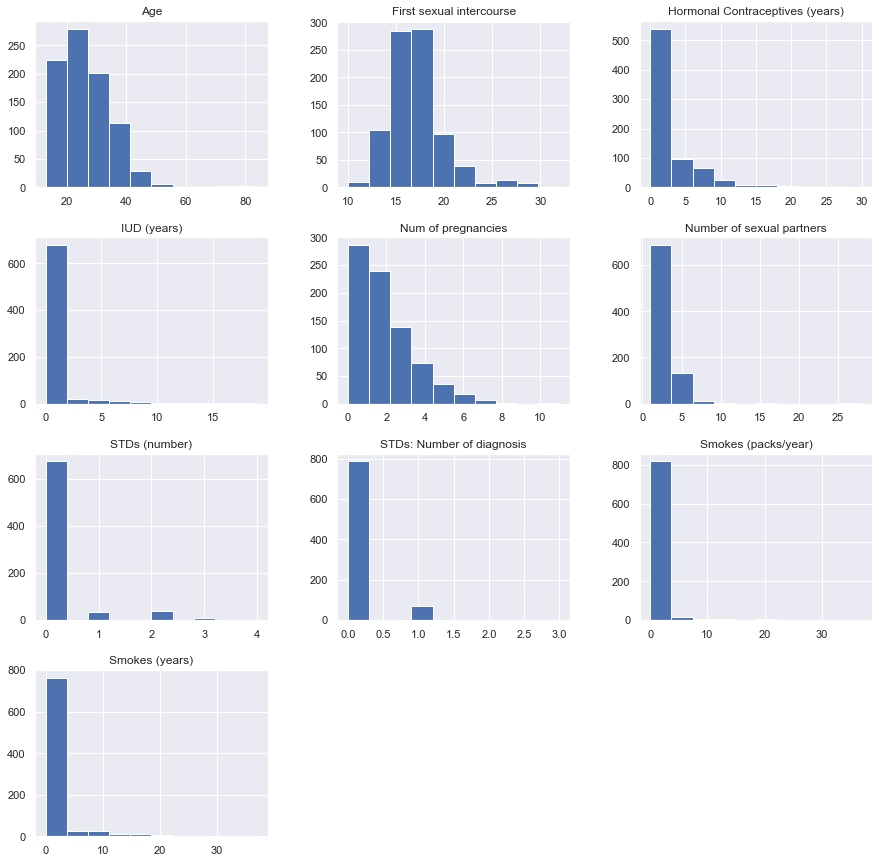

In [263]:
df.hist(figsize=(15,15));

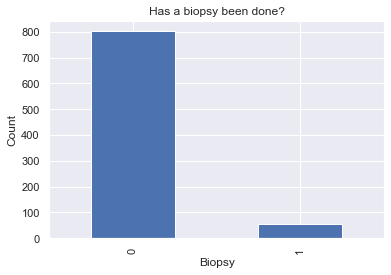

In [262]:
#Let's see the target variable distribution
df['Biopsy'].value_counts().plot(kind = 'bar', xticks = df['Biopsy'])
plt.xlabel('Biopsy')
plt.ylabel('Count')

plt.title('Has a biopsy been done?');

There seems to be a huge imbalance on the dataset. The amount of positive Biopsy's is much less than there are no Biopsy's. We will have to deal with the imbalance in the near future using SMOTE. 

# Data Cleaning

Before imputing any values, let's seperate our training and test set and run a classifier on the untouched dataset

In [5]:
X = df.drop(['Biopsy'], axis = 1)
y = df['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 40)

#clf = xgb.XGBClassifier()

#clf.fit(X_train, y_train)

###y_hat_test = clf.predict(X_test)

#print(classification_report(y_test, y_hat_test))

Let's take a look at the distribution of all the variables.

Upon visual inspection and column names, we can infer our continuous and categorical variables:

Continuous : Age, First sexual intercourse, Hormonal Contraceptive(years), IUD (years) Num of pregnancies, Number of sexual partners, STDs (number), STDs: Number of diagnoses, Smokes (packs/year), Smokes (years)

Categorical : Citology, Dx, Dx:CIN, Dx: Cancer, Dx:HPV, Hinselmann, Hormonal Contracetive, IUD, STDs

The kurtosis of the continuous variables show a high level of skewness towards the tails of the distributions. 

In [100]:
#continuous_columns = X_train
X_train.select_dtypes('float64').kurtosis()

Number of sexual partners           76.023989
First sexual intercourse             5.097673
Num of pregnancies                   1.366969
Smokes (years)                      29.493895
Smokes (packs/year)                147.796918
Hormonal Contraceptives (years)      9.956005
IUD (years)                         39.929928
STDs (number)                       10.910721
dtype: float64

In [104]:
X_train.select_dtypes('int64').kurtosis()

Age                           2.238496
STDs: Number of diagnosis    18.379650
dtype: float64

 Given the visual inspection of the distributions and the kurtosis of the distributions of the continuous variables, we will impute the missing values of the training data using the median.

In [6]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['First sexual intercourse'].fillna(X_train['First sexual intercourse'].median(), inplace=True)

X_train['Num of pregnancies'].fillna(X_train['Num of pregnancies'].median(), inplace = True)

X_train['Hormonal Contraceptives (years)'].fillna(X_train['Hormonal Contraceptives (years)'].median(), inplace = True)
X_train['IUD (years)'].fillna(X_train['IUD (years)'].median(), inplace = True)

X_train['Smokes (packs/year)'].fillna(X_train['Smokes (packs/year)'].median(), inplace = True)
X_train['Smokes (years)'].fillna(X_train['Smokes (years)'].median(), inplace = True)

#X_train['STDs (number)'] = X_train['STDs (number)'].astype('int', errors = 'ignore')
X_train['STDs (number)'].fillna(X_train['STDs (number)'].median(), inplace = True)



#X_train['Number of sexual partners'] = X_train['Number of sexual partners'].astype('float')
X_train['Number of sexual partners'].fillna(X_train['Number of sexual partners'].median(), inplace = True)


X_train['STDs: Number of diagnosis'].fillna(X_train['STDs: Number of diagnosis'].median(), inplace = True)

cols = columns_under_x(X_train, 4)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Continuous variables have now been imputed. Now we wll see what we can do with the categorical variables. The continuous variables are positively skewed. We can adjust this by applying log transformations.

In [629]:
#pd.get_dummies(X_train, columns = X_train[columns_under_x(X_train, 4)].columns)
cols = columns_under_x(X_train, 4)
X_train.loc[:, cols] = X_train.loc[:, cols].astype('category')
knn = KNNImputer(n_neighbors=11)
X_train_knn_imputed = knn.fit_transform(X_train)

X_train_knn_imputed = pd.DataFrame(data = X_train_knn_imputed, columns= X_train.columns)
X_train_knn_imputed.loc[:,cols]= X_train_knn_imputed.loc[:, cols].round()
X_train_knn_imputed = pd.get_dummies(X_train_knn_imputed,
                                     columns = columns_under_x(X_train_knn_imputed, 4),
                                     drop_first=True)


C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [630]:
X_train_knn_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 31 columns):
Age                                       574 non-null float64
Number of sexual partners                 574 non-null float64
First sexual intercourse                  574 non-null float64
Num of pregnancies                        574 non-null float64
Smokes (years)                            574 non-null float64
Smokes (packs/year)                       574 non-null float64
Hormonal Contraceptives (years)           574 non-null float64
IUD (years)                               574 non-null float64
STDs (number)                             574 non-null float64
STDs: Number of diagnosis                 574 non-null float64
Smokes_1.0                                574 non-null uint8
Hormonal Contraceptives_1.0               574 non-null uint8
IUD_1.0                                   574 non-null uint8
STDs_1.0                                  574 non-null uint8
STDs:condylomatosis_1

In [588]:

#pd.get_dummies(X_train[columns_under_x(X_train, 4)], columns = columns_under_x(X_train, 4), drop_first=True)
#X_train_cat[columns_under_x(X_train,4)] = X_train[columns_under_x(X_train,4)].astype('category')
#X_train = pd.get_dummies(X_train, columns = X_train[columns_under_x(X_train, 4)].columns, drop_first=True)
X_train_knn_imputed.isna().sum()

Age                                       0
Number of sexual partners                 0
First sexual intercourse                  0
Num of pregnancies                        0
Smokes (years)                            0
Smokes (packs/year)                       0
Hormonal Contraceptives (years)           0
IUD (years)                               0
STDs (number)                             0
STDs: Number of diagnosis                 0
Smokes_1.0                                0
Hormonal Contraceptives_1.0               0
IUD_1.0                                   0
STDs_1.0                                  0
STDs:condylomatosis_1.0                   0
STDs:vaginal condylomatosis_1.0           0
STDs:vulvo-perineal condylomatosis_1.0    0
STDs:syphilis_1.0                         0
STDs:pelvic inflammatory disease_1.0      0
STDs:genital herpes_1.0                   0
STDs:molluscum contagiosum_1.0            0
STDs:HIV_1.0                              0
STDs:Hepatitis B_1.0            

# Data Modeling

Now let's see how this training model works on a test set. We will clean the test set using the original dataset. Then apply a logisitic regression on the test set.

In [7]:
#apply a minmaxscaler to the training data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_knn_imputed)
X_train_knn_imputed = pd.DataFrame(X_train_scaled, columns= X_train_knn_imputed.columns)

#logisitic Regression on the imputed X_train data
log = LogisticRegression(C = 1, solver = 'liblinear', penalty = 'l1')
log.fit(X_train_knn_imputed, y_train)


#fill missing continuous values for test set

X_test['Age'].fillna(df['Age'].median(), inplace=True)
X_test['First sexual intercourse'].fillna(df['First sexual intercourse'].median(), inplace=True)

X_test['Num of pregnancies'].fillna(df['Num of pregnancies'].median(), inplace = True)

X_test['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median(), inplace = True)
X_test['IUD (years)'].fillna(df['IUD (years)'].median(), inplace = True)

X_test['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median(), inplace = True)
X_test['Smokes (years)'].fillna(df['Smokes (years)'].median(), inplace = True)

#X_train['STDs (number)'] = X_train['STDs (number)'].astype('int', errors = 'ignore')
X_test['STDs (number)'].fillna(df['STDs (number)'].median(), inplace = True)

#X_train['Number of sexual partners'] = X_train['Number of sexual partners'].astype('float')
X_test['Number of sexual partners'].fillna(df['Number of sexual partners'].median(), inplace = True)
STDs_number = X_test['STDs: Number of diagnosis'].fillna(df['STDs: Number of diagnosis'].median(), 
                                                                                 inplace = True)

#impute missing categorical variables using KNNImputer

knn = KNNImputer(n_neighbors=11)
X_test_knn_imputed = knn.fit_transform(X_test)

X_test_knn_imputed = pd.DataFrame(data = X_test_knn_imputed, columns= X_test.columns)
X_test_knn_imputed.loc[:,cols]= X_test_knn_imputed.loc[:, cols].round()
X_test_knn_imputed = pd.get_dummies(X_test_knn_imputed,
                                    columns = columns_under_x(X_test_knn_imputed, 4),
                                    drop_first=True
                                    )
#find columns dropped 

cols_to_add = list(set(X_train_knn_imputed.columns).difference(set(X_test_knn_imputed.columns)))

#add columns dropped from drop_first

for col in cols_to_add:
    X_test_knn_imputed[col] = np.zeros((284,1))

X_test_knn_imputed.drop('STDs: Number of diagnosis_1.0', axis = 1, inplace = True)

#Apply a MinMaxScaler to test set
scaler = MinMaxScaler()
X_test_scaled = scaler.fit_transform(X_test_knn_imputed)
X_test_knn_imputed = pd.DataFrame(X_test_scaled, columns=X_test_knn_imputed.columns)

y_hat_test = log.predict(X_test_knn_imputed)

#y_hat_train = log.predict(X_train)

print(classification_report(y_test, y_hat_test))

NameError: name 'X_train_knn_imputed' is not defined

The KNNImputer has inaccurately classed any of the positive cases. Let's try imputation of the categorcal variables with the mode instead.

In [8]:
X_train_copy = X_train.copy()
X_train_copy.loc[:, cols] = X_train_copy[cols].astype('int')
for col in cols:
    X_train_copy[col].fillna(X_train_copy[col].mode(), inplace = True)
    
#scale the X_train data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_copy)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train_copy.columns)

X_test_copy = X_test.copy()

X_test_copy['Age'].fillna(df['Age'].median(), inplace=True)
X_test_copy['First sexual intercourse'].fillna(df['First sexual intercourse'].median(), inplace=True)

X_test_copy['Num of pregnancies'].fillna(df['Num of pregnancies'].median(), inplace = True)

X_test_copy['Hormonal Contraceptives (years)'].fillna(df['Hormonal Contraceptives (years)'].median(), inplace = True)
X_test_copy['IUD (years)'].fillna(df['IUD (years)'].median(), inplace = True)

X_test_copy['Smokes (packs/year)'].fillna(df['Smokes (packs/year)'].median(), inplace = True)
X_test_copy['Smokes (years)'].fillna(df['Smokes (years)'].median(), inplace = True)

#X_train['STDs (number)'] = X_train['STDs (number)'].astype('int', errors = 'ignore')
X_test_copy['STDs (number)'].fillna(df['STDs (number)'].median(), inplace = True)

#X_train['Number of sexual partners'] = X_train['Number of sexual partners'].astype('float')
X_test_copy['Number of sexual partners'].fillna(df['Number of sexual partners'].median(), inplace = True)
#STDs_number = X_test['STDs: Number of diagnosis'].fillna(df['STDs: Number of diagnosis'].median(), 
 #                                                                                inplace = True)

X_test_copy.loc[:, cols] = X_test_copy[cols].astype('int')
for col in cols:
    X_test_copy[col].fillna(X_test_copy[col].mode(), inplace = True)

#fit and transform the X_test using a MinMaxScaler
X_test_scaled = scaler.fit_transform(X_test_copy)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test_copy.columns)

Great! The logisitic regresson worked. However the results are rather poor. The accuracy of detecting 0's s not as important as actually catching 1's. The 1's are cases that actually have cancer. With the recall at 67%, this means that 33% of the test data are giving out false negatives, or to say people that actually need a Biopsy are not gven one. This is not so good.

In [10]:
X_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 574 entries, 561 to 326
Data columns (total 33 columns):
Age                                   574 non-null int64
Number of sexual partners             574 non-null float64
First sexual intercourse              574 non-null float64
Num of pregnancies                    574 non-null float64
Smokes                                574 non-null int32
Smokes (years)                        574 non-null float64
Smokes (packs/year)                   574 non-null float64
Hormonal Contraceptives               574 non-null int32
Hormonal Contraceptives (years)       574 non-null float64
IUD                                   574 non-null int32
IUD (years)                           574 non-null float64
STDs                                  574 non-null int32
STDs (number)                         574 non-null float64
STDs:condylomatosis                   574 non-null int32
STDs:cervical condylomatosis          574 non-null int32
STDs:vaginal condyloma

In [111]:
log = LogisticRegression(C = 1, solver = 'liblinear',penalty = 'l1' )
#X_train_encoded = pd.get_dummies(X_train_copy, columns = cols)
#X_test_encoded = pd.get_dummies(X_test_copy, columns= cols)
log.fit(X_train_scaled, y_train)

y_hat_test = log.predict(X_test_scaled)

print(classification_report(y_hat_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       271
           1       0.62      0.77      0.69        13

    accuracy                           0.97       284
   macro avg       0.81      0.87      0.84       284
weighted avg       0.97      0.97      0.97       284



In [117]:
svc = SVC(kernel = 'linear', C = 50, gamma = 'scale')

svc.fit(X_train_scaled, y_train)

y_hat_test = svc.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       268
           1       0.69      0.56      0.62        16

    accuracy                           0.96       284
   macro avg       0.83      0.77      0.80       284
weighted avg       0.96      0.96      0.96       284



In [13]:
X_train_copy.isna().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [143]:
svm = []
random_forest = []
log_reg = []
svm = []
dtrees = []
k_nn = []

support_vector_model = SVC()
random_forest_model = RandomForestClassifier()
log_reg_model = LogisticRegression()
bagging_model = BaggingClassifier()
knn_model = KNeighborsClassifier()
xgb_model = xgb.XGBClassifier()

grid_output = []
grid_output2 = []
svm_grid = []

svc_param_grid = {
    'kernel' : ['linear'],
    'C' : [50, 10, 1.0, 0.1, 0.01],
    'gamma' : ['scale']
}

rf_param_grid = {
    'n_estimators':[10, 100, 1000],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2']
}
log_param_grid = {
    'solver': ['newton-cg', 'liblinear', 'lbfgs'],
    'C' : [1e12, 100, 10, 1.0, 0.1, 0.01],
    'penalty': ['l1', 'l2']
}

bagging_param_grid = {
    'n_estimators' : [10, 100, 1000],
    
}

knn_param_grid = {
    'n_neighbors' : [1,3,5,7,9,11,13,15],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}
models = [support_vector_model, random_forest_model, log_reg_model, bagging_model, knn_model]
grids = [svc_param_grid, rf_param_grid, log_param_grid, bagging_param_grid, knn_param_grid]

#random_search = GridSearchCV(log, X_train, random_state= 42)

#random_search.fit(X_train)
for n, model in enumerate(models):
    grid = GridSearchCV(estimator= model, param_grid= grids[n], n_jobs = -1, verbose = 2)
    grid2 = GridSearchCV(estimator = model, param_grid= grids[n], n_jobs = -1, scoring = 'roc_auc')
    grid.fit(X_train_scaled, y_train)
    grid2.fit(X_train_scaled, y_train)
    grid_output.append(grid)
    grid_output2.append(grid2)
    
    
#sc = SVC(kernel='linear')

#sc.fit(X_train, y_train)

#y_hat_test = sc.predict(X_test)

#print(classification_report(y_test, y_hat_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.7s finished


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.1s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    7.4s finished


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.1s finished


In [16]:
grid_output[1].best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}

In [118]:
grid_output[0].best_params_

{'C': 50, 'gamma': 'scale', 'kernel': 'linear'}

In [145]:
grid_output2[0].best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [147]:
svc = SVC(C = 0.1, gamma='scale', kernel = 'linear')
svc.fit(X_train_scaled, y_train)

y_hat_test = svc.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       268
           1       0.68      0.94      0.79        16

    accuracy                           0.97       284
   macro avg       0.84      0.96      0.89       284
weighted avg       0.98      0.97      0.97       284



In [120]:
grid_output[1].best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}

In [148]:
grid_output2[1].best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

In [151]:
rf = RandomForestClassifier(criterion='gini', max_features='sqrt', n_estimators=100)
rf.fit(X_train_scaled, y_train)

y_hat_test = rf.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       268
           1       0.64      0.44      0.52        16

    accuracy                           0.95       284
   macro avg       0.80      0.71      0.75       284
weighted avg       0.95      0.95      0.95       284



In [123]:
grid_output[2].best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [152]:
grid_output2[2].best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

In [154]:
log = LogisticRegression(C = 1, penalty= 'l2', solver= 'newton-cg')

log.fit(X_train_scaled, y_train)

y_hat_test = log.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       268
           1       0.77      0.62      0.69        16

    accuracy                           0.97       284
   macro avg       0.87      0.81      0.84       284
weighted avg       0.97      0.97      0.97       284



In [126]:
grid_output[3].best_params_

{'n_estimators': 1000}

In [155]:
grid_output2[3].best_params_

{'n_estimators': 10}

In [157]:
bag_clf = BaggingClassifier(n_estimators=1000)

bag_clf.fit(X_train_scaled, y_train)

y_hat_test = bag_clf.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       268
           1       0.62      0.50      0.55        16

    accuracy                           0.95       284
   macro avg       0.79      0.74      0.76       284
weighted avg       0.95      0.95      0.95       284



In [128]:
grid_output[4].best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

In [158]:
grid_output2[4].best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

In [161]:
knn_clf = KNeighborsClassifier(metric='euclidean', n_neighbors= 7, weights= 'distance')

knn_clf.fit(X_train_scaled, y_train)

y_hat_test = knn_clf.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       268
           1       0.69      0.56      0.62        16

    accuracy                           0.96       284
   macro avg       0.83      0.77      0.80       284
weighted avg       0.96      0.96      0.96       284



AUC for 0.1: 0.9839085820895521
-------------------------------------------------------------------------------------
AUC for 0.25: 0.9846082089552239
-------------------------------------------------------------------------------------
AUC for 0.33: 0.9848414179104478
-------------------------------------------------------------------------------------
AUC for 0.5: 0.9857742537313432
-------------------------------------------------------------------------------------
AUC for 0.7: 0.9867070895522388
-------------------------------------------------------------------------------------
AUC for even: 0.9864738805970149
-------------------------------------------------------------------------------------


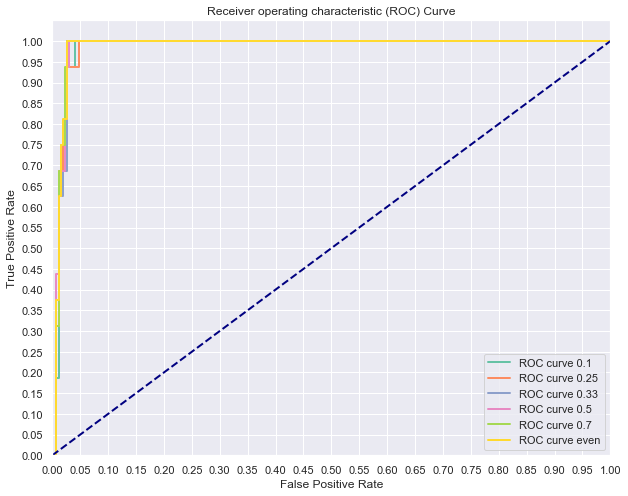

In [246]:
ratios = [0.1, 0.25, 0.33, 0.5, 0.7, 1]
names = ['0.1', '0.25', '0.33','0.5','0.7','even']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10, 8))

for n, ratio in enumerate(ratios):
    smote = SMOTE(sampling_strategy=ratio, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)
    log = LogisticRegression(solver= 'newton-cg', C = 1, penalty = 'l2')
    log.fit(X_train_resampled, y_train_resampled)
    
    # Predict
    y_hat_test = log.predict(X_test_scaled)

    y_score = log.decision_function(X_test_scaled)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
#print(classification_report(y_test, y_hat_test))

After trying all of the sampling strategies, the best classifier to use is the Logisitic Regression with these hyperparameters detailed below.

In [273]:
smote = SMOTE(sampling_strategy= .5, random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)
log = LogisticRegression(solver= 'liblinear', C = 1, penalty = 'l1')
log.fit(X_train_resampled, y_train_resampled)
    
# Predict
y_hat_test = log.predict(X_test_scaled)

y_score = log.decision_function(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       268
           1       0.70      1.00      0.82        16

    accuracy                           0.98       284
   macro avg       0.85      0.99      0.90       284
weighted avg       0.98      0.98      0.98       284



In [274]:

# get importance
importance = log.coef_[0]
features = []

# summarize feature importance
for i,v in enumerate(importance):
    features.append(df.columns[i])
    print('Feature:',df.columns[i], 'Score:',v )
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()



Feature: Age Score: -2.684745412836765
Feature: Number of sexual partners Score: 0.0
Feature: First sexual intercourse Score: -0.486715545263807
Feature: Num of pregnancies Score: 0.0
Feature: Smokes Score: 0.0
Feature: Smokes (years) Score: 0.0
Feature: Smokes (packs/year) Score: 0.0
Feature: Hormonal Contraceptives Score: 1.0260339823958622
Feature: Hormonal Contraceptives (years) Score: 0.0
Feature: IUD Score: 0.0
Feature: IUD (years) Score: 0.0
Feature: STDs Score: 0.0
Feature: STDs (number) Score: 0.0
Feature: STDs:condylomatosis Score: 0.0
Feature: STDs:cervical condylomatosis Score: 0.0
Feature: STDs:vaginal condylomatosis Score: 0.0
Feature: STDs:vulvo-perineal condylomatosis Score: 0.0
Feature: STDs:syphilis Score: 0.0
Feature: STDs:pelvic inflammatory disease Score: 0.0
Feature: STDs:genital herpes Score: 0.0
Feature: STDs:molluscum contagiosum Score: 0.0
Feature: STDs:AIDS Score: 0.0
Feature: STDs:HIV Score: 0.0
Feature: STDs:Hepatitis B Score: 0.0
Feature: STDs:HPV Score: 0

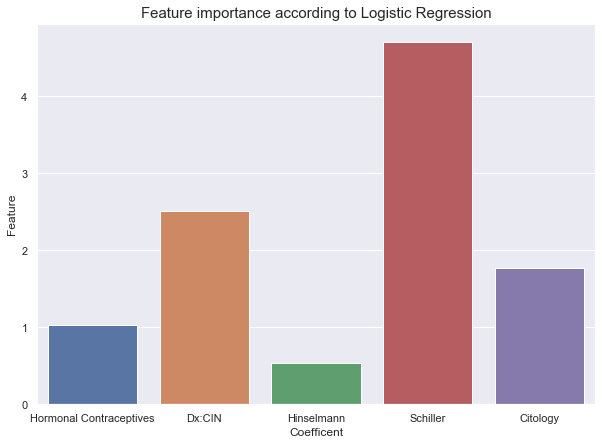

In [282]:
name = []
coefficient = []
for i, coef in enumerate(log.coef_[0]):
    if coef > 0:
        name.append(df.columns[i])
        coefficient.append(coef)
sns.set()      
plt.figure(figsize = (10,7))
sns.barplot(name, coefficient)
plt.title('Feature importance according to Logistic Regression', fontdict={ 'fontsize': 15})
plt.xlabel('Coefficent')
plt.ylabel('Feature')
plt.show();

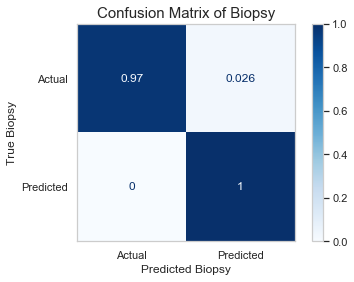

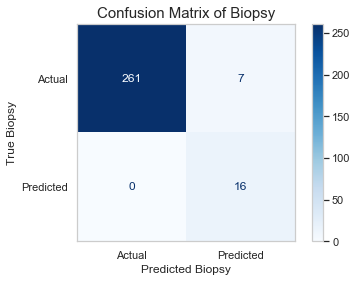

In [308]:
#sns.heatmap([y_test, y_hat_test], annot=True)
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False})
plot_confusion_matrix(log.fit(X_train_resampled, y_train_resampled),X_test_scaled, y_test, 
                      cmap = plt.cm.Blues, 
                      normalize = 'true',
                      display_labels= ['Actual', 'Predicted'],
                      #labels = ['Biopsy', 'd', 'd', 'd', 'd', 'd']
                    );
plt.xlabel('Predicted Biopsy')
plt.ylabel('True Biopsy')
plt.title('Confusion Matrix of Biopsy', 
          fontdict = {'fontsize': 15})
plt.show();

plot_confusion_matrix(log.fit(X_train_resampled, y_train_resampled),X_test_scaled, y_test, 
                      cmap = plt.cm.Blues, 
                      display_labels= ['Actual', 'Predicted'],
                      #labels = ['Biopsy', 'd', 'd', 'd', 'd', 'd']
                    );
plt.xlabel('Predicted Biopsy')
plt.ylabel('True Biopsy')
plt.title('Confusion Matrix of Biopsy', 
          fontdict = {'fontsize': 15})
plt.show();


In [142]:
boost = xgb.XGBClassifier()
boost.fit(X_train_scaled, y_train)

y_hat_test = boost.predict(X_test_scaled)

print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       268
           1       0.62      0.50      0.55        16

    accuracy                           0.95       284
   macro avg       0.79      0.74      0.76       284
weighted avg       0.95      0.95      0.95       284



# Conclusion

The introduction of SMOTE increased the precision, recall, and f1-score of the model. Using a sampling ratio of 0.1, the overall weighted accuracy is 98%. However the real story is the recall percentage, which is at 100%. This number is more important for this. The higher the recall, the better we are able to prevent false negatives. This is to say we don't want people who have cancer, to die because we did not detect that a person does have cancer. The higher the percentage, the less people we miss. Having a 100% accuracy prevents any false negatives from recurring.


The more complex machine leaerning methods for prediction did not have as good a recall score as the Logistic Regression. The Support Vector Classification had a similar recall score and precision score. However the Recall score of the Logistic Regression will save lives as opposed to the lower recall score of the Support Vector Machine.

# Recommendations

The Hospital should use this model to assist their doctors with the determination of doing a Biopsy on a patient who has a risk for cervical cancer.

- Advise patients to stop smoking or at least lower the amount of times they smoke
- Advise patients to practice safer sex.
- Hormonal Contraceptives and IUD usage shows an increased risk for a Biopsy as. Advise not to use these for a lowered risk


